In [1]:
import io
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [2]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df["Loan_ID"].duplicated().sum()

0

In [10]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [13]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [14]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender,Married,Dependents, Self Employed,Loan Amount, Term and Property Area and needs to be treated

# Treating Missing Values

In [16]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [26]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])


In [18]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])


In [19]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


In [20]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Maried                0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

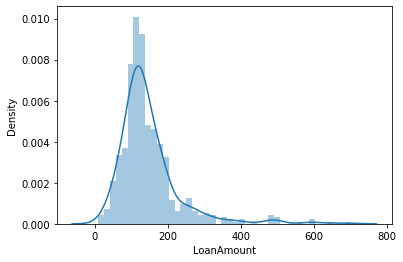

In [21]:
sns.distplot(df["LoanAmount"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

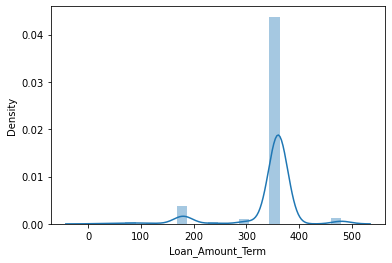

In [22]:
sns.distplot(df["Loan_Amount_Term"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

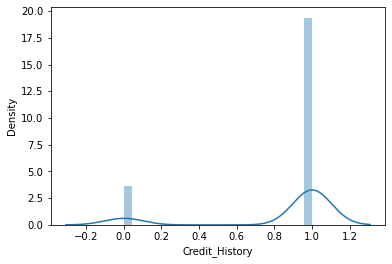

In [23]:
sns.distplot(df["Credit_History"])

In [24]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())



In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

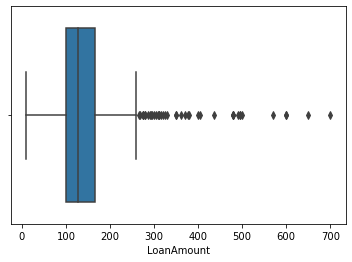

In [31]:
sns.boxplot(df["LoanAmount"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History'>

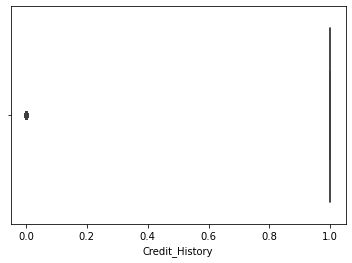

In [32]:
sns.boxplot(df["Credit_History"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

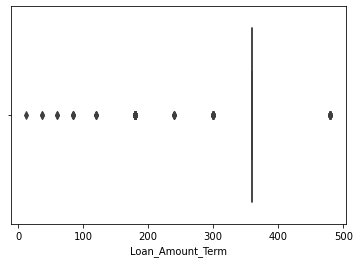

In [33]:
sns.boxplot(df["Loan_Amount_Term"])

# Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<AxesSubplot:>

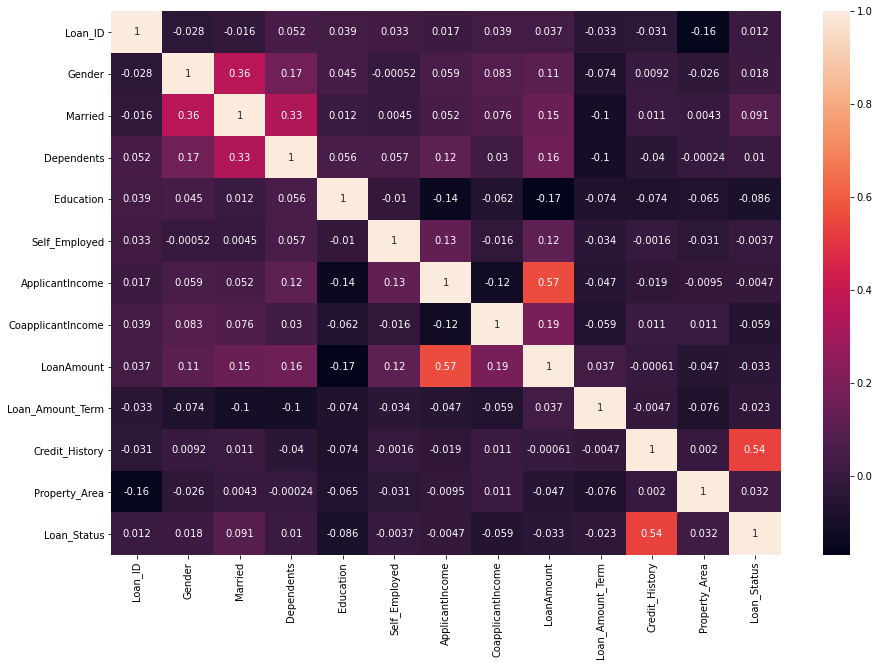

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [36]:
df=df.drop(["Married","LoanAmount"],axis=1)

<AxesSubplot:>

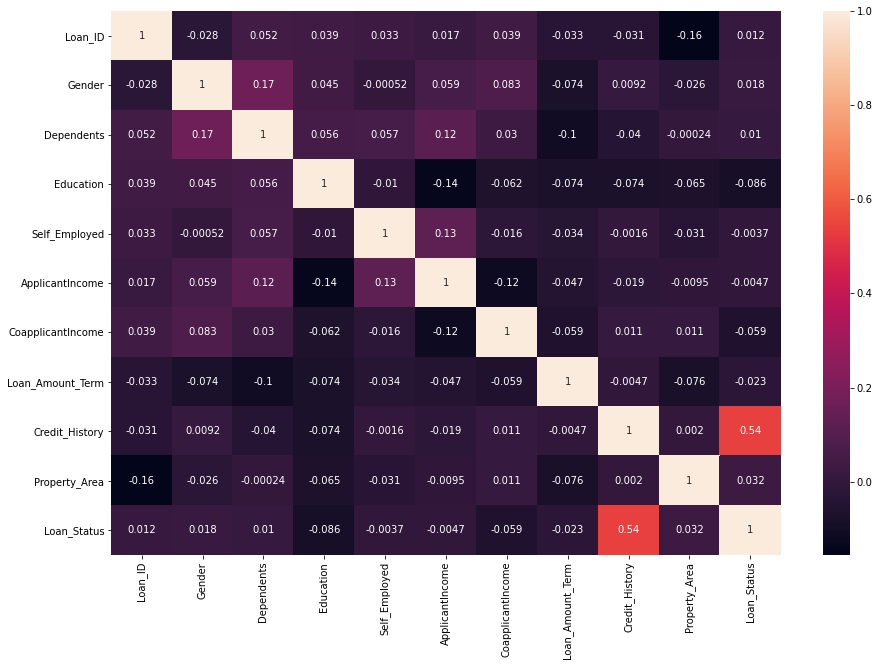

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Treating Outliers

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(614, 11)

In [39]:
z1=pd.DataFrame(z)
z1
z1.head(50)

,0,1,2,3,4,5,6,7,8,9,10
0,1.729232,0.472343,0.737806,0.528362,0.392601,0.072991,0.554487,0.273231,0.411733,1.223298,0.674519
1,1.723590,0.472343,0.253470,0.528362,0.392601,0.134412,0.038732,0.273231,0.411733,1.318513,1.482537
2,1.717948,0.472343,0.737806,0.528362,2.547117,0.393747,0.554487,0.273231,0.411733,1.223298,0.674519
3,1.712307,0.472343,0.737806,1.892641,0.392601,0.462062,0.251980,0.273231,0.411733,1.223298,0.674519
4,1.706665,0.472343,0.737806,0.528362,0.392601,0.097728,0.554487,0.273231,0.411733,1.223298,0.674519
5,1.701023,0.472343,1.244745,0.528362,2.547117,0.002218,0.880600,0.273231,0.411733,1.223298,0.674519
6,1.695381,0.472343,0.737806,1.892641,0.392601,0.503019,0.035995,0.273231,0.411733,1.223298,0.674519
7,1.689739,0.472343,2.236021,0.528362,0.392601,0.387850,0.301914,0.273231,2.428760,0.047607,1.482537
8,1.684097,0.472343,1.244745,0.528362,0.392601,0.228939,0.032575,0.273231,0.411733,1.223298,0.674519
9,1.678455,0.472343,0.253470,0.528362,0.392601,1.218457,3.196713,0.273231,0.411733,0.047607,1.482537


In [40]:
df1=df[(z<3).all(axis=1)]
df1

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,5849,0.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0,0
2,2,1,0,0,1,3000,0.0,360.0,1.0,2,1
3,3,1,0,1,0,2583,2358.0,360.0,1.0,2,1
4,4,1,0,0,0,6000,0.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,2900,0.0,360.0,1.0,0,1
610,610,1,3,0,0,4106,0.0,180.0,1.0,0,1
611,611,1,1,0,0,8072,240.0,360.0,1.0,2,1
612,612,1,2,0,0,7583,0.0,360.0,1.0,2,1


In [41]:
Dataloss=((614-588)/614)*100
Dataloss

4.234527687296417

# Splitting DataFrame

In [43]:
x=df1.iloc[:,0:10]
y=df1.iloc[:,-1]
x

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,5849,0.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0
2,2,1,0,0,1,3000,0.0,360.0,1.0,2
3,3,1,0,1,0,2583,2358.0,360.0,1.0,2
4,4,1,0,0,0,6000,0.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,2900,0.0,360.0,1.0,0
610,610,1,3,0,0,4106,0.0,180.0,1.0,0
611,611,1,1,0,0,8072,240.0,360.0,1.0,2
612,612,1,2,0,0,7583,0.0,360.0,1.0,2


In [44]:
df1.skew()

Loan_ID             -0.005569
Gender              -1.623420
Dependents           1.052092
Education            1.335777
Self_Employed        2.193532
ApplicantIncome      2.275513
CoapplicantIncome    1.373741
Loan_Amount_Term    -2.076968
Credit_History      -2.007254
Property_Area       -0.051290
Loan_Status         -0.826151
dtype: float64

The below fields are skewed and rest are categorical so no need to be treated
ApplicantIncome      2.275513
CoapplicantIncome    1.373741
Loan_Amount_Term    -2.076968
Credit_History      -2.007254

# Treating Skewness

In [45]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling Data

In [46]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

# Logistic Regression as only 2 values in Target Variable

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [50]:
l=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,0)==round(accuracy_score(y_test,pred_test)*100,0):
        print("At random state:",i)
        print("Traning score is :-",accuracy_score(y_train,pred_train)*100)
        print("Test score is :-",accuracy_score(y_test,pred_test)*100)
        l.append(i)

At random state: 16
Traning score is :- 81.48936170212767
Test score is :- 80.50847457627118
At random state: 41
Traning score is :- 81.91489361702128
Test score is :- 82.20338983050848
At random state: 46
Traning score is :- 81.91489361702128
Test score is :- 82.20338983050848


we can choose random state 41 

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=0.20)


In [52]:
lr_predict=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,lr_predict)
for j in range(2,10):
    lssscore=cross_val_score(lr,x,y,cv=j)
    lsc=lssscore.mean()
    print("cv:",j)
    print("cross validation score is",lsc*100)
    print("Accuracy_score :",lss*100)

cv: 2
cross validation score is 81.29251700680273
Accuracy_score : 81.35593220338984
cv: 3
cross validation score is 80.44217687074831
Accuracy_score : 81.35593220338984
cv: 4
cross validation score is 81.63265306122449
Accuracy_score : 81.35593220338984
cv: 5
cross validation score is 81.47472113573808
Accuracy_score : 81.35593220338984
cv: 6
cross validation score is 81.29251700680271
Accuracy_score : 81.35593220338984
cv: 7
cross validation score is 81.46258503401359
Accuracy_score : 81.35593220338984
cv: 8
cross validation score is 81.64568678267308
Accuracy_score : 81.35593220338984
cv: 9
cross validation score is 81.46853146853147
Accuracy_score : 81.35593220338984


# ROC Curve

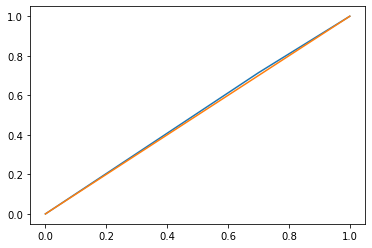

In [60]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

We can select CV=8 as the score is more than other folds

# Random Forest Classifier

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'class_weight':["balanced","balanced_subsample"],'random_state':[41]}
rf =RandomForestClassifier()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'auto', 'random_state': 41}


In [55]:
from sklearn.metrics import classification_report
rf= RandomForestClassifier(criterion="entropy",max_features="auto",class_weight="balanced_subsample",random_state=41)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)
print(classification_report(pred_decision,y_test))

              precision    recall  f1-score   support

           0       0.44      0.83      0.58        18
           1       0.96      0.81      0.88       100

    accuracy                           0.81       118
   macro avg       0.70      0.82      0.73       118
weighted avg       0.88      0.81      0.83       118



# DTC

In [56]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'splitter':["best", "random"],'random_state':[41]}
DTC =DecisionTreeClassifier()
FitParameters = GridSearchCV(DTC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'random_state': 41, 'splitter': 'random'}


In [57]:
from sklearn.metrics import classification_report
DTC1= DecisionTreeClassifier(criterion="gini",max_features="auto",random_state=41,splitter="random")
DTC1.fit(x_train, y_train)
DTC1.score(x_train, y_train)
x_predict = DTC1.predict(x_test)
print(classification_report(x_predict,y_test))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51        36
           1       0.79      0.80      0.80        82

    accuracy                           0.71       118
   macro avg       0.66      0.65      0.65       118
weighted avg       0.71      0.71      0.71       118



# SVC

In [58]:
from sklearn import svm
parameters = {'gamma':['scale','auto'],'random_state':[41],'shrinking':[True,False]}
SVC=svm.SVC()
FitParameters = GridSearchCV(SVC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'gamma': 'scale', 'random_state': 41, 'shrinking': True}


In [59]:
svc= svm.SVC(gamma="scale",random_state=41,shrinking=True)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
x_predict = svc.predict(x_test)
print(classification_report(x_predict,y_test))

              precision    recall  f1-score   support

           0       0.41      0.88      0.56        16
           1       0.98      0.80      0.88       102

    accuracy                           0.81       118
   macro avg       0.69      0.84      0.72       118
weighted avg       0.90      0.81      0.84       118



# Guassian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb =GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)
x_predict = gnb.predict(x_test)

print(classification_report(x_predict,y_test))


              precision    recall  f1-score   support

           0       0.47      0.89      0.62        18
           1       0.98      0.82      0.89       100

    accuracy                           0.83       118
   macro avg       0.72      0.85      0.75       118
weighted avg       0.90      0.83      0.85       118



From all the above Gaussian Naive Bayes is the best algorithm

In [64]:
import pickle
filename = 'LS.pkl'
pickle.dump(gnb, open(filename, 'wb'))

In [65]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1])

In [66]:
predicted=np.array(gnb.predict(x_test))
predicted

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
113,1,1
114,1,1
115,1,1
116,0,1
